In [32]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [33]:
df_hourly_rates = pd.read_csv(r"C:\Users\tsdy1r24\OneDrive - University of Southampton\Documents\Model Building\Arrival_Distribution\hourly_count_and_average-EM(Method3).csv")

In [35]:
# Define the start date
start_date = datetime(2025, 1, 7)

# Define the end date (one year later)
end_date = start_date + timedelta(days=365)

# df_hourly_rates is a DataFrame with columns 'Weekend', 'hour_of_day', and 'Average_Arrivals'
avg_arrivals_weekday = df_hourly_rates[df_hourly_rates['Weekend'] == 'Weekday'].set_index('hour_of_day')['Average_Arrivals'].to_dict()
avg_arrivals_weekend = df_hourly_rates[df_hourly_rates['Weekend'] == 'Weekend'].set_index('hour_of_day')['Average_Arrivals'].to_dict()

# Initialize the result list
result = []

# Iterate over each hour of each day in the year
current_date = start_date
while current_date < end_date:
    # Determine whether the current day is a weekend or a weekday
    day_type = 'Weekend' if current_date.weekday() >= 5 else 'Weekday' # method in datetime module; 0 Monday 1 Tuesday ....6 Sunday
    
    # Iterate over each hour of the day
    for hour in range(24):
        # Get the average arrivals for the current hour and day type
        avg_arrivals = avg_arrivals_weekday[hour] if day_type == 'Weekday' else avg_arrivals_weekend[hour]
        
        # Generate the number of patients for the current hour using a Poisson distribution
        patients = np.random.poisson(avg_arrivals)
        
        # Add the generated patients to the result
        for _ in range(patients):
            result.append({'date': current_date.date(), 'day_of_week': day_type, 'hour_of_day': hour})
    
    # Move to the next day
    current_date += timedelta(days=1)

# Convert the result to a DataFrame
df_simulated_patients_hourly = pd.DataFrame(result)

# Print the DataFrame
print(df_simulated_patients_hourly)

            date day_of_week  hour_of_day
0     2025-01-07     Weekday            1
1     2025-01-07     Weekday            2
2     2025-01-07     Weekday            2
3     2025-01-07     Weekday            4
4     2025-01-07     Weekday            5
...          ...         ...          ...
8861  2026-01-06     Weekday           21
8862  2026-01-06     Weekday           21
8863  2026-01-06     Weekday           22
8864  2026-01-06     Weekday           22
8865  2026-01-06     Weekday           23

[8866 rows x 3 columns]


In [36]:
df_simulated_patients_hourly.to_csv(r"C:\Users\tsdy1r24\OneDrive - University of Southampton\Documents\Model Building\Arrival_Distribution\simulated_patients_hourly_Poisson.csv")

C:\Users\tsdy1r24\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsdy1r24\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


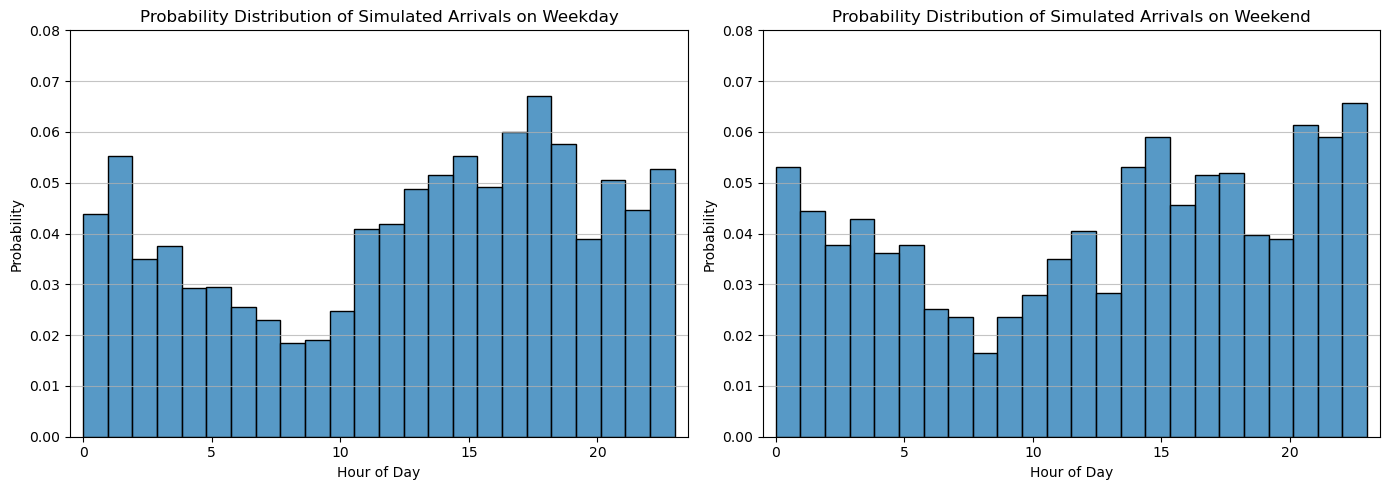

In [37]:
import seaborn as sns

# Separate the data into weekdays and weekends
df_weekdays = df_simulated_patients_hourly[df_simulated_patients_hourly['day_of_week'] == 'Weekday']
df_weekends = df_simulated_patients_hourly[df_simulated_patients_hourly['day_of_week'] == 'Weekend']

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Create a list of days
days = ['Weekday', 'Weekend']

# Create a probability distribution for each day of the week separately
for i, day in enumerate(days):
    # Filter the data for the current day
    day_data = df_simulated_patients_hourly[df_simulated_patients_hourly['day_of_week'] == day]['hour_of_day']
    
    # Create a histogram for the current day
    sns.histplot(day_data, bins=24, kde=False, stat="probability", ax=axs[i])
    axs[i].set_title(f'Probability Distribution of Simulated Arrivals on {day}')
    axs[i].set_xlabel('Hour of Day')
    axs[i].set_ylabel('Probability')
    axs[i].grid(axis='y', alpha=0.75)
    axs[i].set_xlim([-0.5, 23.5])
    axs[i].set_ylim([0, 0.08])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [38]:
# Group the data by 'date', 'day_of_week', and 'Weekend', and count the number of arrivals for each group
daily_arrivals = df_simulated_patients_hourly.groupby(['date', 'day_of_week']).size().reset_index()

# Rename the 0 column to 'Arrival_Count'
daily_arrivals = daily_arrivals.rename(columns={0: 'Arrival_Count'})

# Print the DataFrame
print(daily_arrivals)

           date day_of_week  Arrival_Count
0    2025-01-07     Weekday             23
1    2025-01-08     Weekday             21
2    2025-01-09     Weekday             29
3    2025-01-10     Weekday             25
4    2025-01-11     Weekend             24
..          ...         ...            ...
360  2026-01-02     Weekday             24
361  2026-01-03     Weekend             25
362  2026-01-04     Weekend             19
363  2026-01-05     Weekday             23
364  2026-01-06     Weekday             26

[365 rows x 3 columns]


In [39]:
daily_arrivals.to_csv('daily_arrivals_Poisson_hourly_rates.csv')

C:\Users\tsdy1r24\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tsdy1r24\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


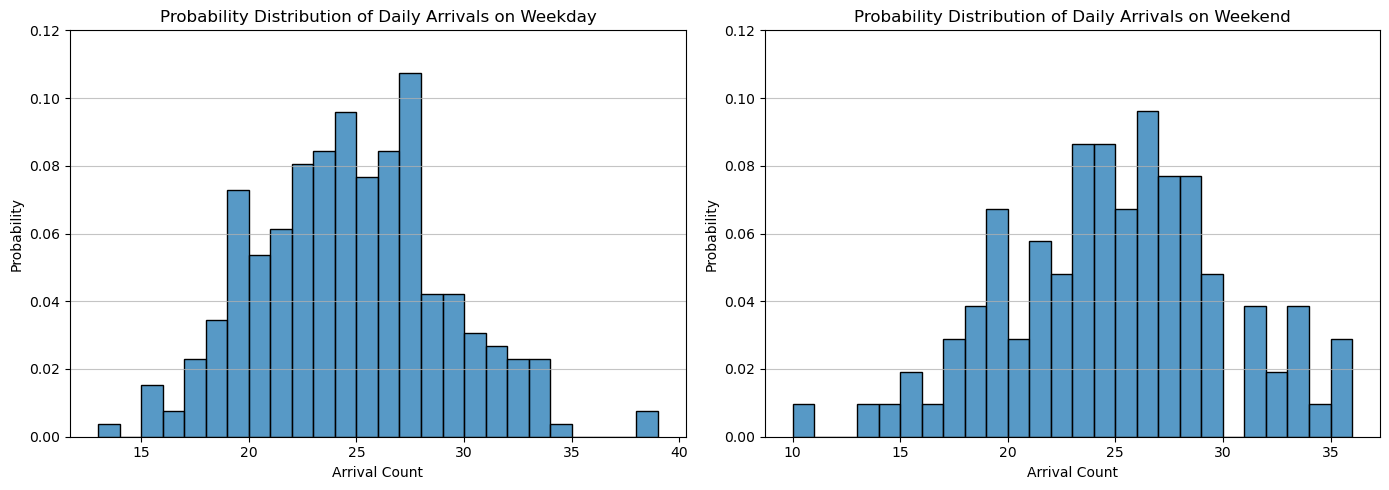

In [40]:
import seaborn as sns

# Separate the data into weekdays and weekends
daily_arrivals_weekdays = daily_arrivals[daily_arrivals['day_of_week'] == 'Weekday']
daily_arrivals_weekends = daily_arrivals[daily_arrivals['day_of_week'] == 'Weekend']

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Create a list of days
days = ['Weekday', 'Weekend']

# Create a probability distribution for each day of the week separately
for i, day in enumerate(days):
    # Filter the data for the current day
    day_data = daily_arrivals[daily_arrivals['day_of_week'] == day]['Arrival_Count']
    
    # Create a histogram for the current day
    sns.histplot(day_data, bins=range(min(day_data), max(day_data) + 1), kde=False, stat="probability", ax=axs[i])
    axs[i].set_title(f'Probability Distribution of Daily Arrivals on {day}')
    axs[i].set_xlabel('Arrival Count')
    axs[i].set_ylabel('Probability')
    axs[i].grid(axis='y', alpha=0.75)
    axs[i].set_ylim([0, 0.12])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [41]:
from scipy import stats

# Extract the data for weekdays and weekends separately
empirical_data_weekday = daily_counts_weekend.loc['Weekday'].values.flatten()
empirical_data_weekend = daily_counts_weekend.loc['Weekend'].values.flatten()

simulated_data_weekday = daily_arrivals[daily_arrivals['day_of_week'] == 'Weekday']['Arrival_Count']
simulated_data_weekend = daily_arrivals[daily_arrivals['day_of_week'] == 'Weekend']['Arrival_Count']

# Perform the Kolmogorov-Smirnov test for weekdays
D_statistic_weekday, p_value_weekday = stats.ks_2samp(empirical_data_weekday, simulated_data_weekday)
print(f"Weekdays:")
print(f"D statistic: {D_statistic_weekday}")
print(f"p-value: {p_value_weekday}")

# Perform the Kolmogorov-Smirnov test for weekends
D_statistic_weekend, p_value_weekend = stats.ks_2samp(empirical_data_weekend, simulated_data_weekend)
print(f"Weekends:")
print(f"D statistic: {D_statistic_weekend}")
print(f"p-value: {p_value_weekend}")

Weekdays:
D statistic: 0.08812260536398467
p-value: 0.2632535679888447
Weekends:
D statistic: 0.125
p-value: 0.3923437076405491


In [42]:
# checking statistical significance of simulated hourly arrival data compared to historical hourly arrival data

# Extract the data for weekdays and weekends separately
empirical_data_weekday = count_by_hour[count_by_hour['Weekend'] == 'Weekday']['hour_of_day'].values.flatten()
empirical_data_weekend = count_by_hour[count_by_hour['Weekend'] == 'Weekend']['hour_of_day'].values.flatten()

simulated_data_weekday = df_simulated[df_simulated['day_of_week'] == 'Weekday']['hour_of_day']
simulated_data_weekend = df_simulated[df_simulated['day_of_week'] == 'Weekend']['hour_of_day']

# Perform the Kolmogorov-Smirnov test for weekdays
D_statistic_weekday, p_value_weekday = stats.ks_2samp(empirical_data_weekday, simulated_data_weekday)
print(f"Weekdays:")
print(f"D statistic: {D_statistic_weekday}")
print(f"p-value: {p_value_weekday}")

# Perform the Kolmogorov-Smirnov test for weekends
D_statistic_weekend, p_value_weekend = stats.ks_2samp(empirical_data_weekend, simulated_data_weekend)
print(f"Weekends:")
print(f"D statistic: {D_statistic_weekend}")
print(f"p-value: {p_value_weekend}")

Weekdays:
D statistic: 0.1183836661795746
p-value: 0.8523131721212266
Weekends:
D statistic: 0.09792909211398278
p-value: 0.9594885751798163
